In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [3]:
# Funzione per leggere i punti da file
def leggi_punti_da_file(nome_file):
    punti = []
    with open(nome_file, 'r') as file:
        for riga in file:
            x_str, y_str = riga.strip().split()
            x, y = float(x_str), float(y_str)
            punti.append((x, y))
    return punti

---

# Esercizio 10

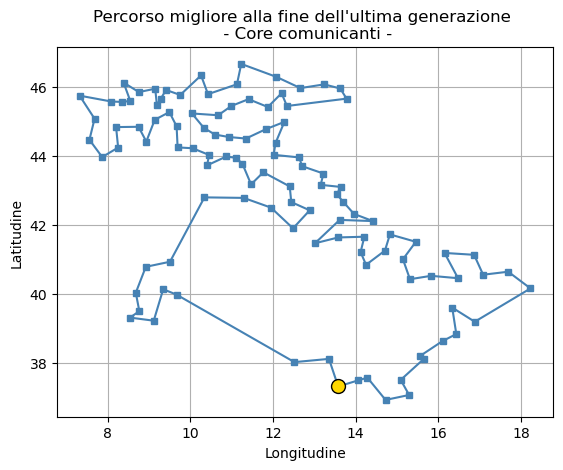

In [8]:
nome_file = 'OUTPUT/best_path_migration.dat'

punti = leggi_punti_da_file(nome_file)
x_vals = [p[0] for p in punti]
y_vals = [p[1] for p in punti]

plt.plot(x_vals, y_vals, 's-', markersize = 5, lw = 1.5, color='steelblue')
plt.scatter(x_vals[0], y_vals[0], s=100, c='gold', edgecolor='black',
            label='Starting City', zorder=10)
plt.title("Percorso migliore alla fine dell'ultima generazione \n - Core comunicanti -")
plt.xlabel("Longitudine")
plt.ylabel("Latitudine")
plt.grid(True)
plt.show()

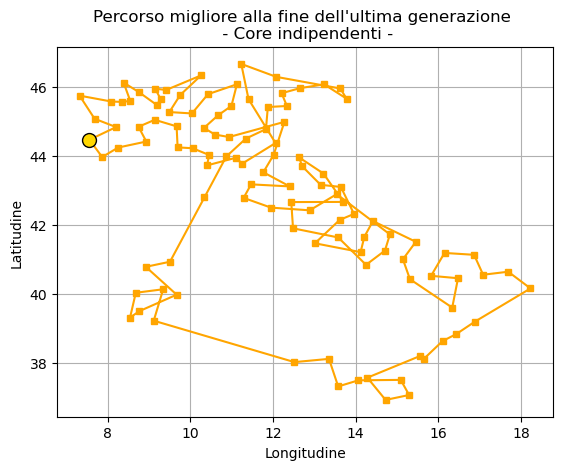

In [9]:
nome_file = 'OUTPUT/best_path_indipendent.dat'

punti = leggi_punti_da_file(nome_file)
x_vals = [p[0] for p in punti]
y_vals = [p[1] for p in punti]

plt.plot(x_vals, y_vals, 's-', markersize = 5, lw = 1.5, color='orange')
plt.scatter(x_vals[0], y_vals[0], s=100, c='gold', edgecolor='black',
            label='Starting City', zorder=10)
plt.title("Percorso migliore alla fine dell'ultima generazione \n - Core indipendenti -")
plt.xlabel("Longitudine")
plt.ylabel("Latitudine")
plt.grid(True)
plt.show()

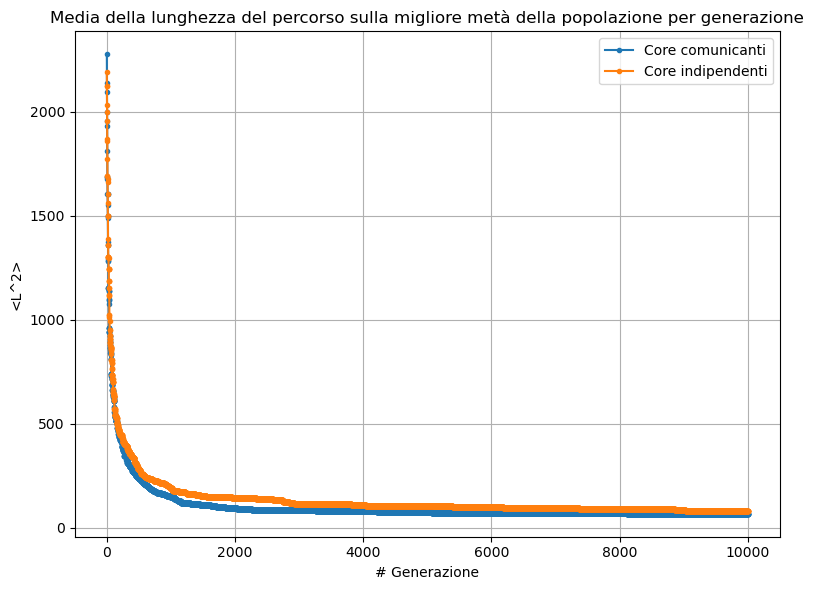

In [10]:
x_share_vals = []
y_share_vals = []
x_close_vals = []
y_close_vals = []

with open('OUTPUT/best_L2_migration.dat', 'r') as file:
    for line in file:
        line = line.strip()
        
        x, y = map(float, line.split())
        
        x_share_vals.append(x)
        y_share_vals.append(y)

with open('OUTPUT/best_L2_indipendent.dat', 'r') as file:
    for line in file:
        line = line.strip()
        
        x, y = map(float, line.split())
        
        x_close_vals.append(x)
        y_close_vals.append(y)

plt.figure(figsize=(8, 6))
plt.plot(x_share_vals, y_share_vals, marker = '.', label="Core comunicanti")
plt.plot(x_close_vals, y_close_vals, marker = '.', label="Core indipendenti")
plt.xlabel("# Generazione")
plt.ylabel("<L^2>")
plt.title("Media della lunghezza del percorso sulla migliore metà della popolazione per generazione")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

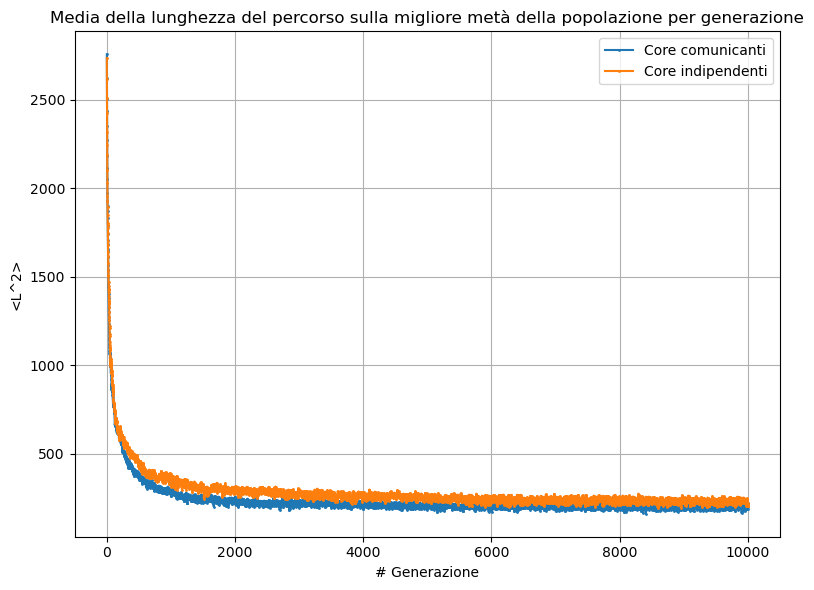

In [7]:
x_share_vals = []
y_share_vals = []
x_close_vals = []
y_close_vals = []

with open('OUTPUT/best_L2_mean_migration.dat', 'r') as file:
    for line in file:
        line = line.strip()
        
        x, y = map(float, line.split())
        
        x_share_vals.append(x)
        y_share_vals.append(y)

with open('OUTPUT/best_L2_mean_indipendent.dat', 'r') as file:
    for line in file:
        line = line.strip()
        
        x, y = map(float, line.split())
        
        x_close_vals.append(x)
        y_close_vals.append(y)

plt.figure(figsize=(8, 6))
plt.plot(x_share_vals, y_share_vals, marker = '.',markersize = 2, label="Core comunicanti")
plt.plot(x_close_vals, y_close_vals, marker = '.',markersize = 2, label="Core indipendenti")
plt.xlabel("# Generazione")
plt.ylabel("<L^2>")
plt.title("Media della lunghezza del percorso sulla migliore metà della popolazione per generazione")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Core comunicanti
La risoluzione del $TSP$ utilizzando $6$ core comunicanti ha portato a una convergenza ottimale del percorso. I risultati riportati sono i migliori tra tutti i core: il percorso è il miglior cromosoma tra tutti i core e per ogni generazione ho riportato i dati migliori nei grafici della fitness.

L’efficacia dell’approccio parallelo e comunicante risiede nella capacità di:
- scambiare informazioni tra i processi che eseguono simulazioni indipendenti;
- diffondere i migliori individui trovati localmente;
- accelerare la convergenza globale verso soluzioni ottimali.

Questo meccanismo riduce il rischio di convergenze premature verso minimi locali, fenomeno comune in problemi di ottimizzazione a molti minimi locali. Difficoltà aggiuntiva del $TSP$ tra i capoluoghi di provincia è che molte città sono vicine, creando di conseguenza zone ricche di minimi locali per la loss.

La collaborazione tra i core è quindi necessaria per esplorare efficaciemente lo spazio del parametro da ottimizzare.

Si osserva in $L^2(x)$:
- una forte decrescita iniziale che evolve a lungo raggio;
- finale stabilizzazione liscia, segno di continue migrazioni che hanno contribuito a trovare migliori individui costantemente.

Per quanto riguarda $\langle L^2(x) \rangle$ si nota un'andamento rumoroso, sintomo di continuo aggiornamento della migliore metà della popolazione.

Per una comunicazione efficace tra i core è necessario scegliere attentamente $N_{mir}$. Un $N_{migr}$ troppo alto rallenta la convergenza e rischia di "intrappolare" ogni processo in minimi locali, poiché non beneficia abbastanza delle buone soluzioni trovate dagli altri processi Un $N_{migr}$  troppo basso invece rallenta la convergenza perchè limita l’esplorazione indipendente dello spazio delle soluzioni da parte di ciascun core. In questo caso si è scelto un $N_{migr} = 500$.


### Core comunicanti vs core indipendenti
Osservando il miglior risultato ottenuto da $6$ core indipendenti non si arriva ad una soluzione ottimale del problema: il percorso evidenzia intersezioni tra le rette, segno che la soluzione del $TSP$ non è globale, ma solo locale.

Per quanto riguarda il grafico di $L^2(x)$ del caso di core indipendenti si notano bruschi cali. Un'interpretazione possibile è che i core indipendenti tendono a stagnare più facilmente, trovando saltuariamente una popolazione con dei cromosomi migliori. Nel caso di core comunicanti la discesa è più liscia, ovvero una continuo scambio di buoni cromosomi. L'andamento di entrambi i metodi è simile con forte decrescita iniziale e stabilizzazione a lungo raggio.

La differenza che discrimina i due approcci è che senza migrazioni ogni core tende a convergere prematuramente verso soluzioni sub-ottimali. Di conseguenza, sia la fitness del miglior individuo, sia quella della metà migliore della popolazione risultano di una peggiore qualità rispetto al caso con core comunicanti, in cui lo scambio di individui permette una più efficace esplorazione dello spazio delle soluzioni.

L'utilizzo di core comunicanti si è dimostrato quindi necessario nel migliorare sia la qualità delle soluzioni ottenute che l'efficienza della convergenza.

Rispetto all’approccio con core indipendenti, la comunicazione tra processi permette di diffondere rapidamente le soluzioni migliori di ogni processo, accelerando la convergenza verso la soluzione ottimale globale. Inoltre, questa strategia risulta più robusta anche in presenza di problemi complessi di $TSP$, dove lo spazio delle soluzioni è vasto e si riscontrano molti ottimi locali.